#EDA

In [1]:
import pandas as pd #recuperation et aliasisation de la librairie pandas

In [2]:
!pip install matplotlib 
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("adult.csv") #lecture du fichier csv et stockage dans la variable df
df.head() #affichage debut du fichier csv
#df.tail() #affichage fin du fichier csv

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#explo Initial

In [5]:
df.info() #affichage des informations du fichier csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe() #affichage des statistiques du fichier csv

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


vue la meme valeur numerique dans chaque colonne , il n y a pas de valeur manquante 

In [7]:
df.nunique() #affichage du nombre de valeurs uniques par colonne

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
df.isnull().sum() #affichage du nombre de valeurs nulles par colonne

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

ci dessous resume scrollable de tous les element vue precedemment 

In [9]:
# Afficher les premières et dernières lignes
print("Premières lignes:")
print(df.head())

print("\nDernières lignes:")
print(df.tail())

# Vérifier les types de données et les valeurs manquantes
print("\nInformation sur le DataFrame:")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe())

# Nombre unique de valeurs dans chaque colonne
print("\nNombre unique de valeurs:")
print(df.nunique())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes:")
print(df.isnull().sum())

Premières lignes:
   age  workclass  fnlwgt     education  educational-num      marital-status   
0   25    Private  226802          11th                7       Never-married  \
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss   
0  Machine-op-inspct    Own-child  Black    Male             0             0  \
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week na

#Nettoyage des donnees 

Identifier les valeurs manquantes dans chaque colonne

In [10]:
missing_values = df.isna().sum()
missing_values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

aucune donne manquante dans le jeu de donnee c est qui rend plus simple et plus rapide l analyse 

boxplot pour chaque colone numeric, pour considerer les valeurs aberante

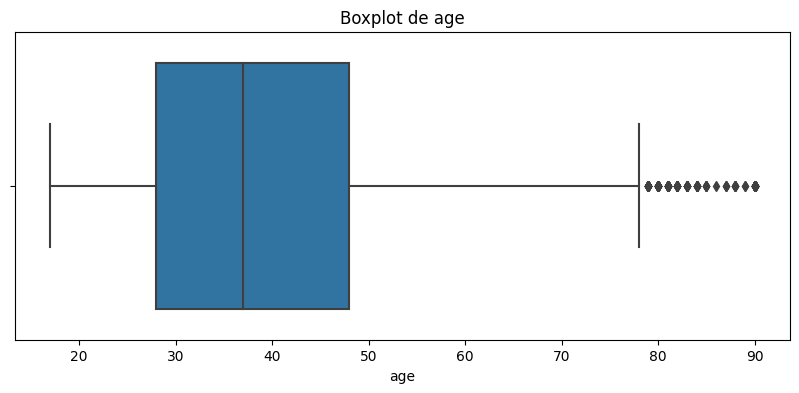

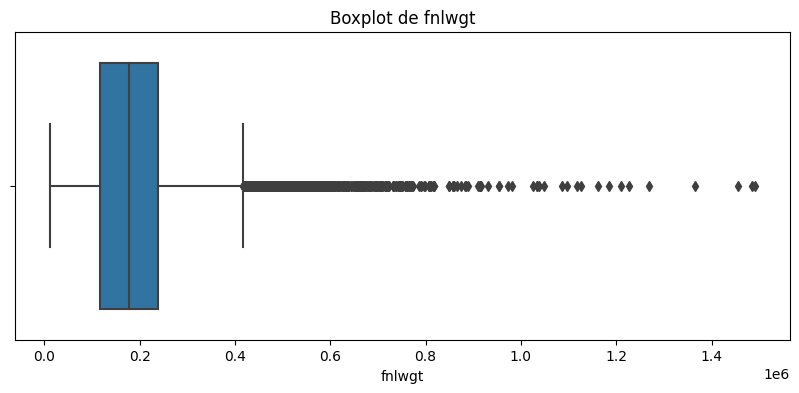

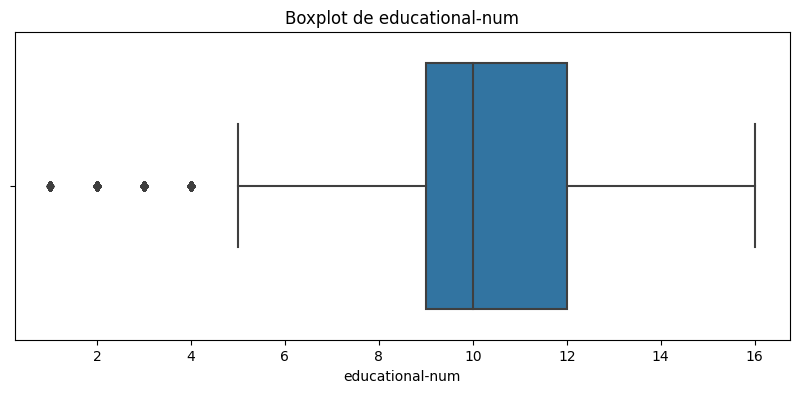

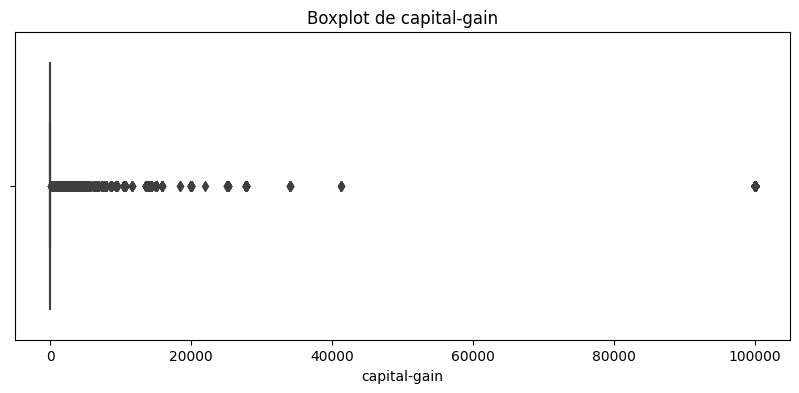

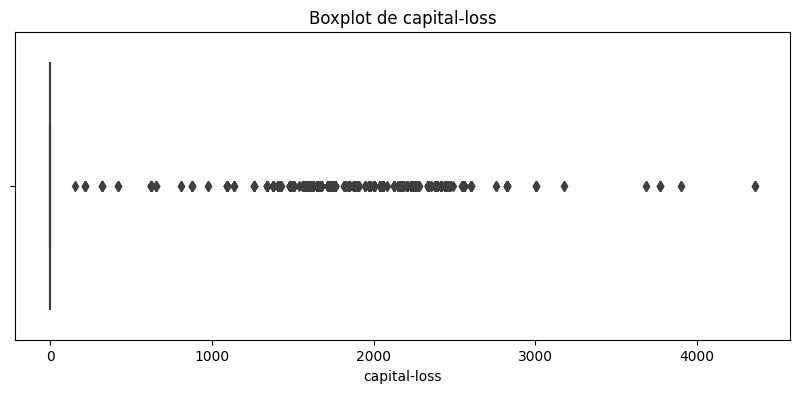

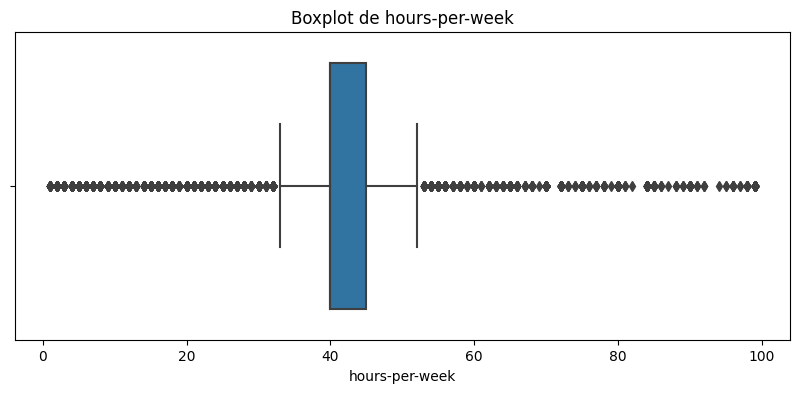

In [24]:
# Identifier les colonnes numériques
numerical_columns = df.select_dtypes(include=['number']).columns

# Créer des boxplots pour chaque colonne numérique afin d'identifier les valeurs aberrantes
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


par la suite nous pourrons soit supprime les valeur aberante, soit les transformer pour reduire l impact soit impute avec la moyene ou la mediane, j attendrais d avancer quelque peu pour prendre la decission avec plus de tenant.(Jai fini, je reviens apres avoir termine LEDA, apres analyse des donne de leur integrite ,ayant peur de biaise le modele ou de reduire sa taille , j ai decide de le garder tel quel )

pour ce qui est de la normalisation ou standardisation cela n est pas vraiment necessaire a part si l ont souhaite faire dun machine learning 

#Analyse biv et multivarie, pour les relation entre deux ou plusieurs variable

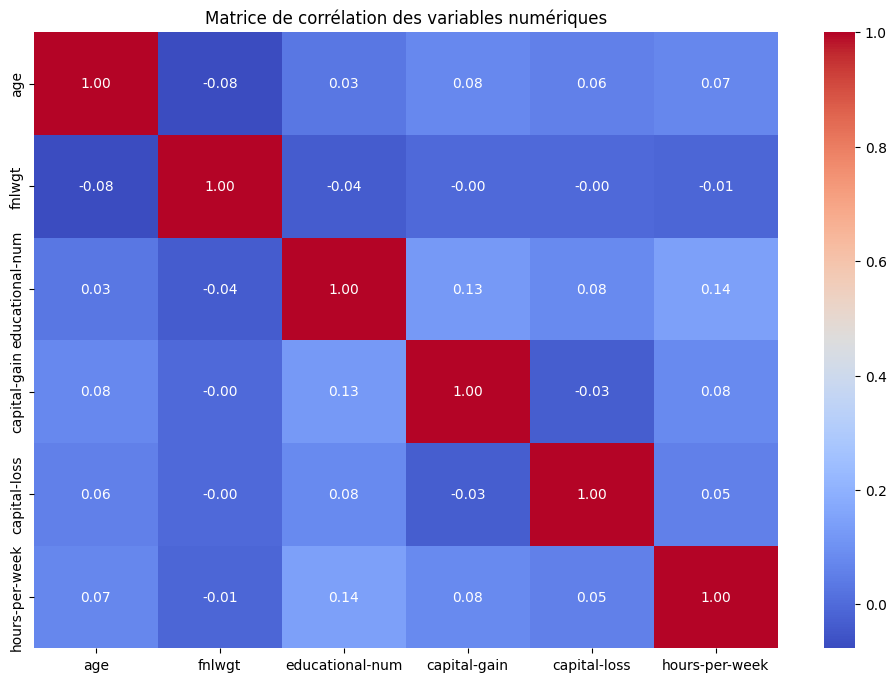

In [26]:
# colonnes numeriques
numerical_columns = df.select_dtypes(include=['number']).columns

# application de la variable a la fonction corr
correlation_matrix = df[numerical_columns].corr()

# viz en heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

en math si "∣r∣<0.3 : très faible ou absence de corrélation", donc les relation de correlation pour chacune des valeur et tres faible

correlation entre colonnes numeriques et categorielles[object]

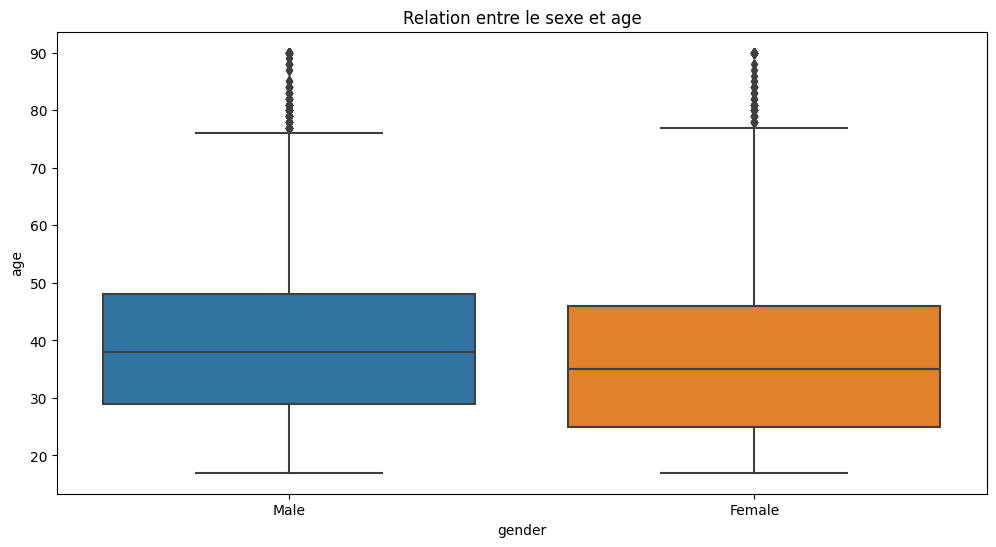

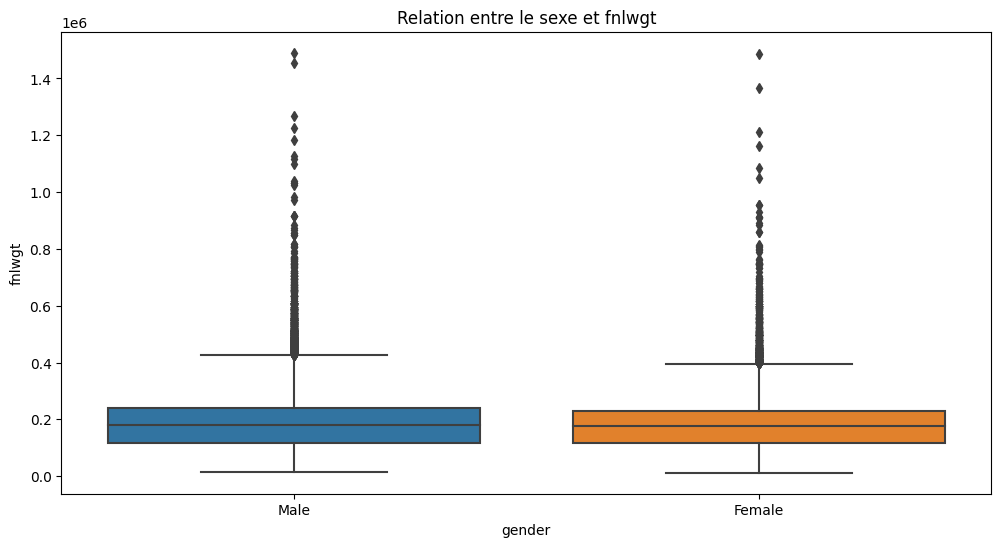

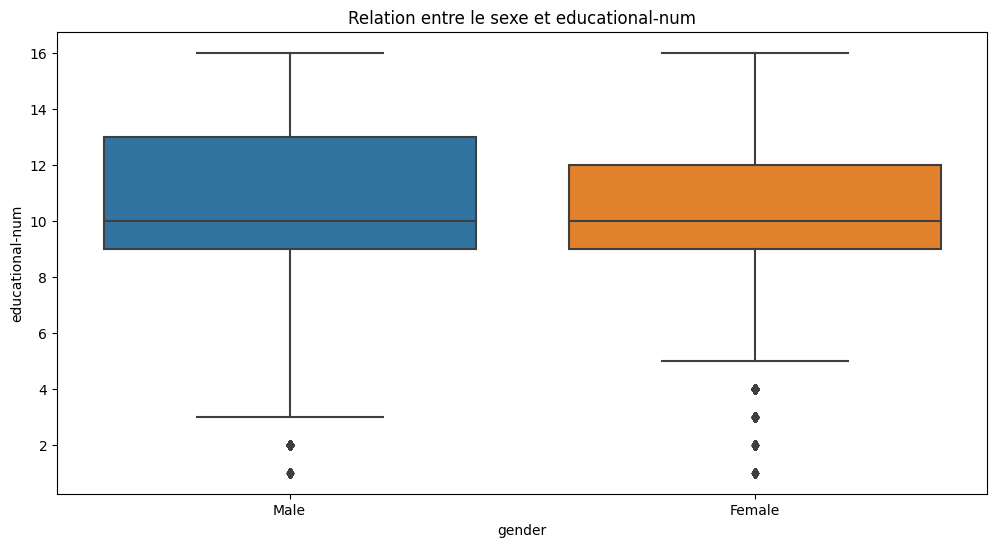

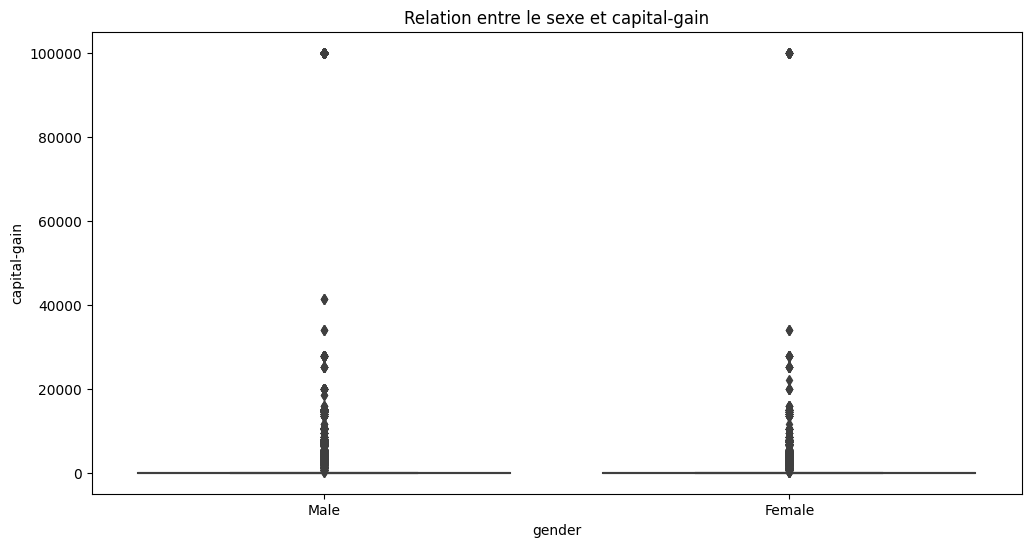

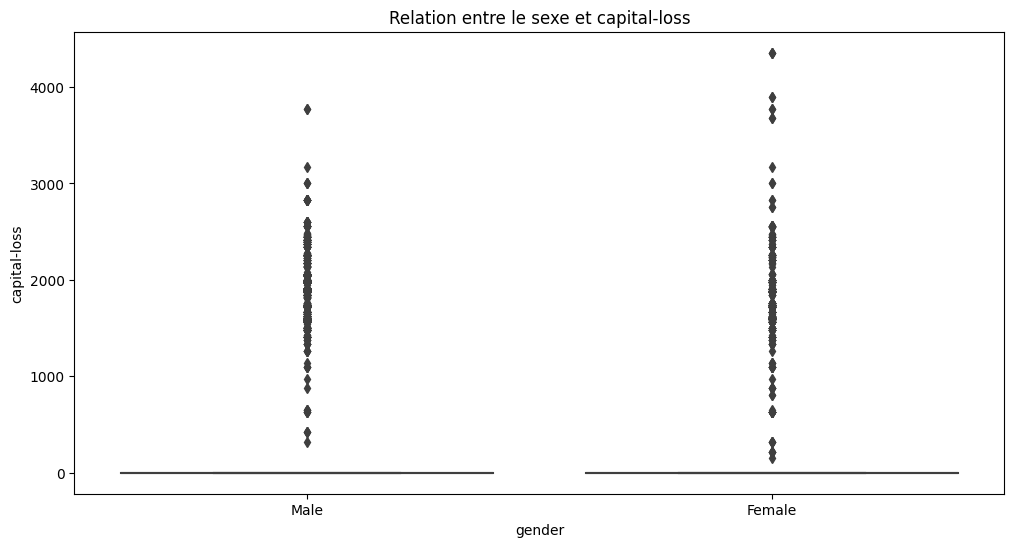

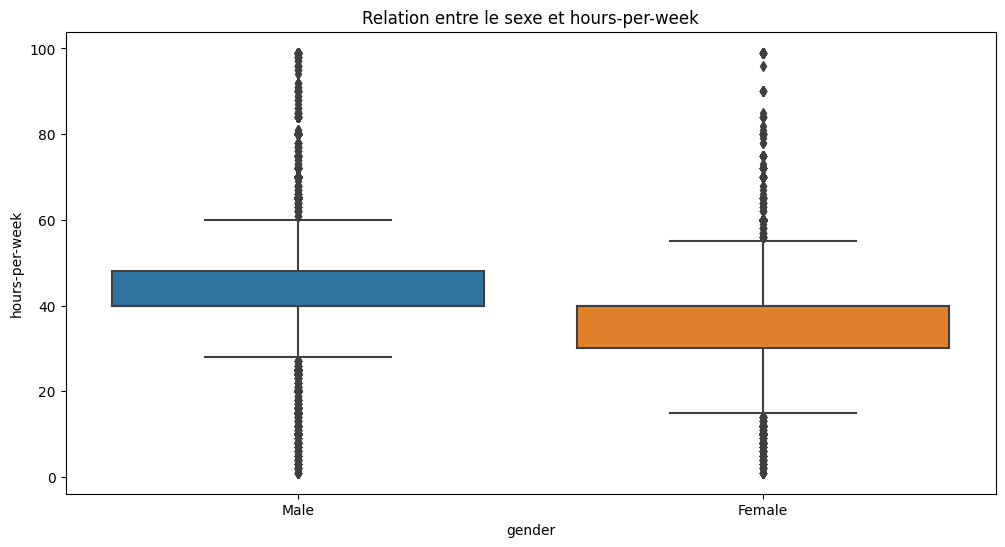

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Créer des boxplots pour la relation entre 'gender' et les variables numériques
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='gender', y=col, data=df)
    plt.title(f'Relation entre le sexe et {col}')
    plt.show()

valeur a peu pres similaire sur chacun des boxplot a part pour(sexe et educational-num&sexe et hours-per-week)

vision entre relation de variable categorielle elle meme , exemple genre et revenu mais egalement education et statut marital 

In [28]:
#tableaux de contingence par paires de variables catégorielles
contingency_gender_income = pd.crosstab(df['gender'], df['income'])
contingency_education_marital_status = pd.crosstab(df['education'], df['marital-status'])

# Affichage
contingency_gender_income, contingency_education_marital_status


(income  <=50K  >50K
 gender             
 Female  14423  1769
 Male    22732  9918,
 marital-status  Divorced  Married-AF-spouse  Married-civ-spouse   
 education                                                         
 10th                 172                  1                 525  \
 11th                 192                  0                 545   
 12th                  63                  0                 199   
 1st-4th               17                  0                 125   
 5th-6th               31                  0                 271   
 7th-8th              101                  0                 541   
 9th                   98                  0                 349   
 Assoc-acdm           280                  2                 697   
 Assoc-voc            361                  2                1013   
 Bachelors            843                  6                4136   
 Doctorate             56                  1                 403   
 HS-grad             2416      

-tres interessant les tableau de contingence car il donne des information statistique clair , exemple :premier tableau de cont on peut constater que la proportion d homme a gagner plus de 50k et nettement superieur a celle des femmes .
-Mais egalement on peut constater que seulement 1/8 des personne doctorant marie divorce, alors que dans la categorie Highschool graduate il y en a 1/4, ce qui nous permet de dire que plus les personnes font d etude moins elle divorce , de maniere strictement comparative et statistique 

#Visualisation des donnees 

Histogramme

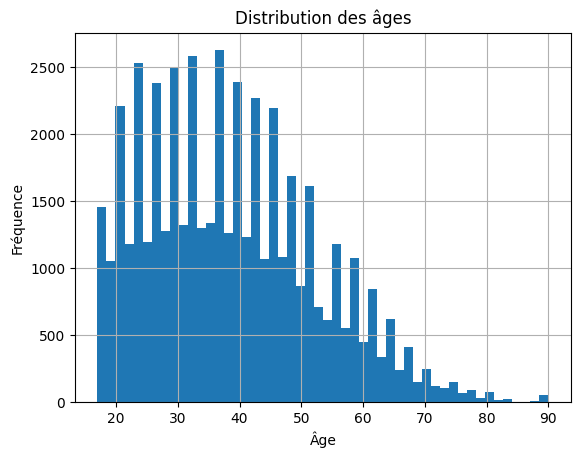

In [11]:
df['age'].hist(bins=50)
plt.title('Distribution des âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

BoxPlot

grand partie de la pupoluation representative a entre 20 et 48 ans et la partie la moins representative a entre 48 et 90 ans

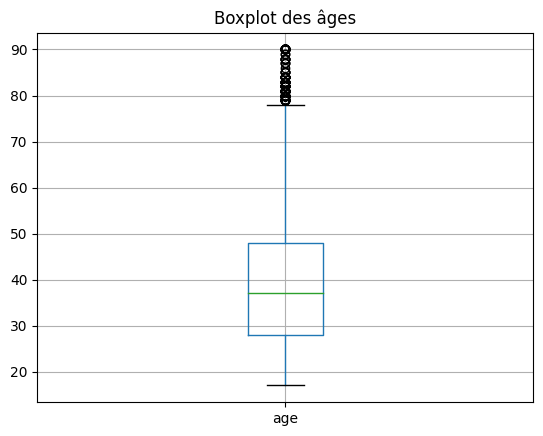

In [12]:
df.boxplot(column=['age'])
plt.title('Boxplot des âges')
plt.show()


on peux noter qu environ toute les valeur superieur a 78 sont des valeurs aberrantes, donc il y en aura a supprimer

variable catgorielles

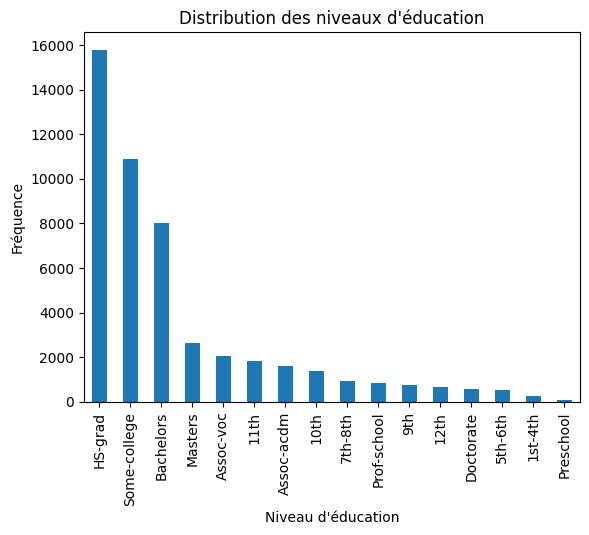

In [13]:
df['education'].value_counts().plot(kind='bar')#sur la colonne education calcule chaque valeur unique et representation en barre 
plt.title('Distribution des niveaux d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Fréquence')
plt.show()

HS-grad(equivalent du BAC)/Some-college(equivaut a des cours non acheve a l universite)/Bachelors a eux trois il represente environ 34000 (presque 3/4) de la pop totale qui est denviron 50000

scatter Plots sur la relation entre les deux variables sur la premiere ligne de code ci dessous 

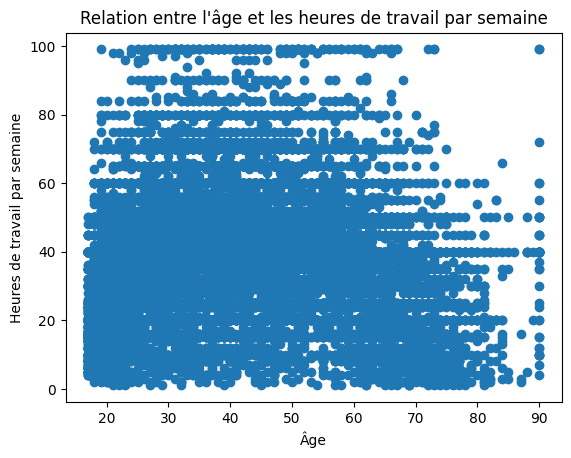

In [14]:
plt.scatter(df['age'], df['hours-per-week'])
plt.title('Relation entre l\'âge et les heures de travail par semaine')
plt.xlabel('Âge')
plt.ylabel('Heures de travail par semaine')
plt.show()


ci dessus nous pouvons observer que la majorite de cette population travaille entre 30 et 50 heure cela correspond plus ou moin a la moyene monde , sachant que specifiquement au USA la moyene de travaille est a 40H

distribution genre

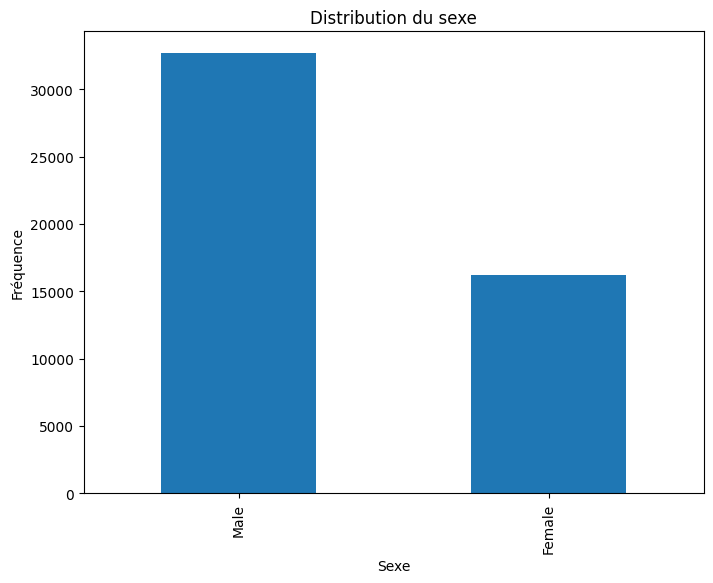

In [15]:
# Distribution du sexe
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribution du sexe')
plt.xlabel('Sexe')
plt.ylabel('Fréquence')
plt.show()


clairement sans meme parler de chiffre on constate que dans cette population 2/3 sont des homme , donc les homme sont bien plus representatif dans cette echantillons 

distribution race

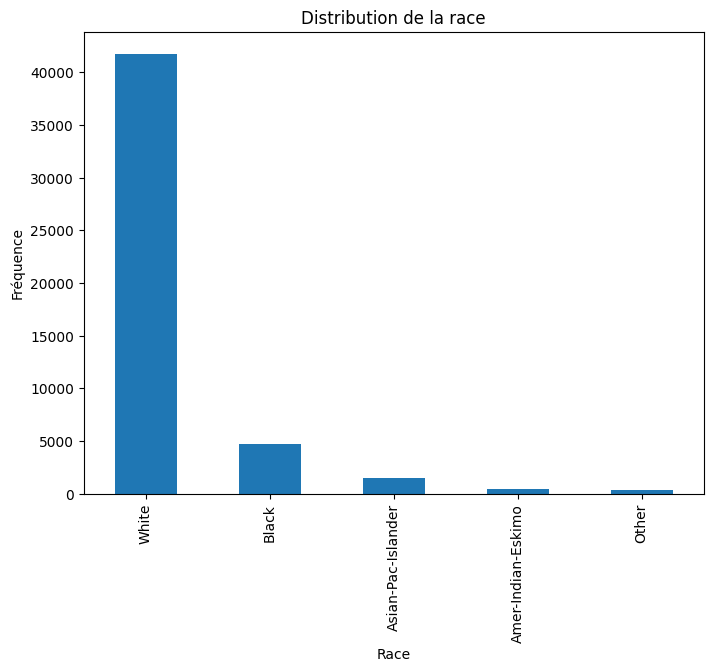

In [16]:
plt.figure(figsize=(8, 6))
df['race'].value_counts().plot(kind='bar')
plt.title('Distribution de la race')
plt.xlabel('Race')
plt.ylabel('Fréquence')
plt.show()

alors la ! c est la donne la plus categorique en terme de resultat c est environ 90 pourcent de cette population qui es represente par la race blanche , la quasitotalite 

distribution pays d origine

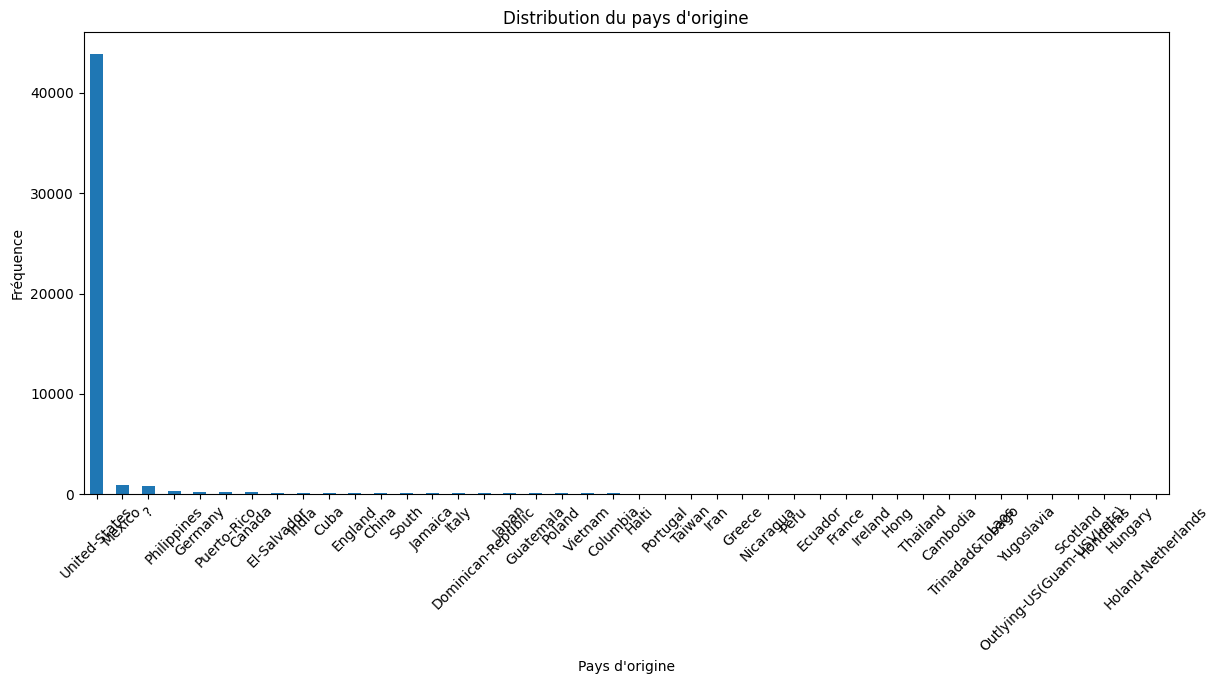

In [17]:
plt.figure(figsize=(14, 6))
df['native-country'].value_counts().plot(kind='bar')
plt.title('Distribution du pays d\'origine')
plt.xlabel('Pays d\'origine')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

visuellement encore une fois on voit que la majorite , si ce n est pas la totalite de l enchatillon  qui est d origine americaine 

capital gain

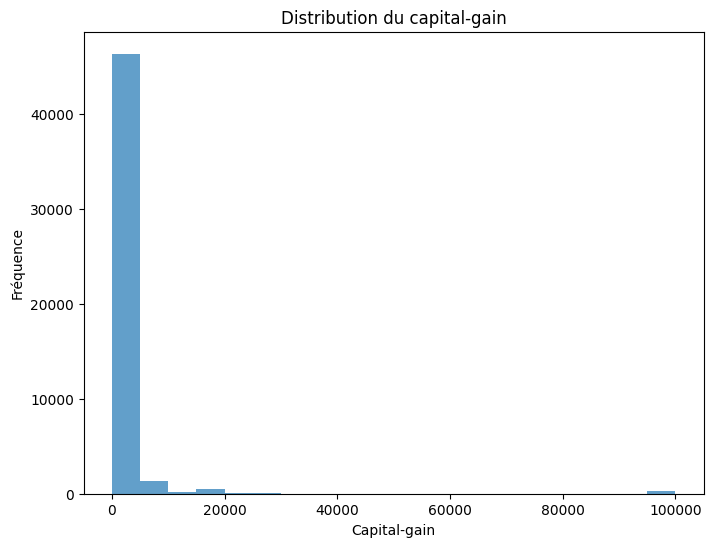

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['capital-gain'], bins=20, alpha=0.7)
plt.title('Distribution du capital-gain')
plt.xlabel('Capital-gain')
plt.ylabel('Fréquence')
plt.show()

la majorite de cette echantillong de population a un "capital gain de 0 donc peut etre que peu on fait des investissement significatif 

capital loss 

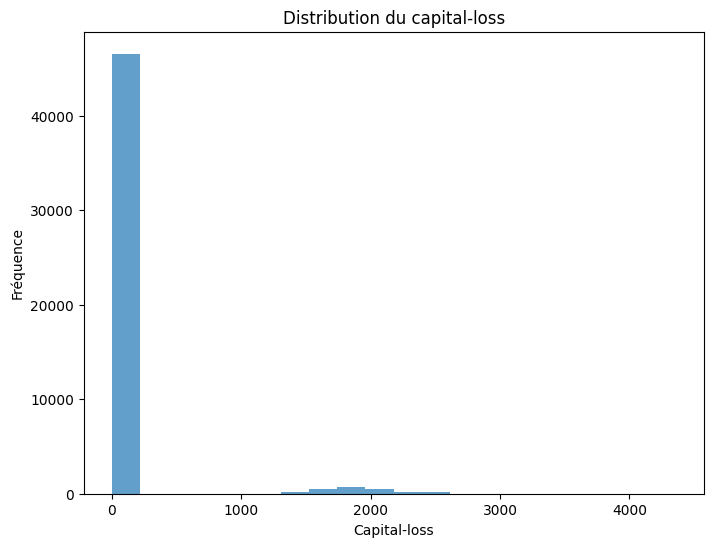

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['capital-loss'], bins=20, alpha=0.7)
plt.title('Distribution du capital-loss')
plt.xlabel('Capital-loss')
plt.ylabel('Fréquence')
plt.show()

pareil que pour capital gain il sont quasiment tout a zero donc dans cette echantillon,g il ont fait subi peu de perte quasi null 

Relation entre Éducation et Revenu

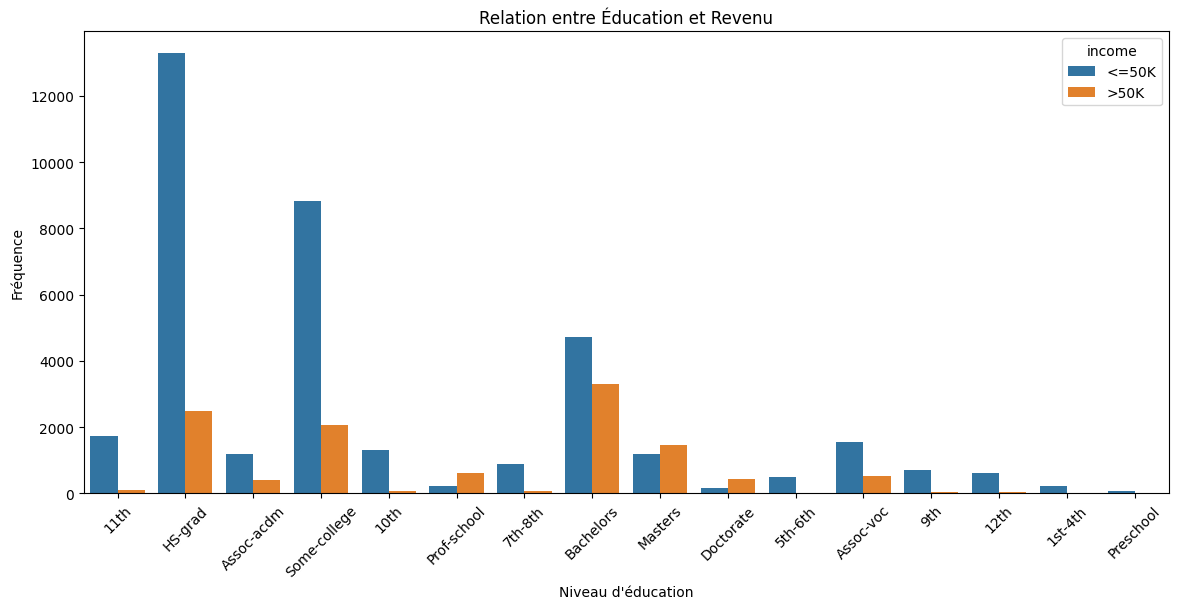

In [20]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Relation entre Éducation et Revenu')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()


clairement on constate que dans toute les categorie les revenu de -50k sont tjrs superieur au +50k , mise a part dans (profschool/master/doctorate)ou il sont superieur , et quasiment egale avec le bachelor , donc on peut clairement etablir sur cette echantillon que plus il font d etude superieur et plus il appartiennent a la cateogrie des +50k par an , donc correlation positive entre niveau d education et revenu

relation entre metier et revenu 

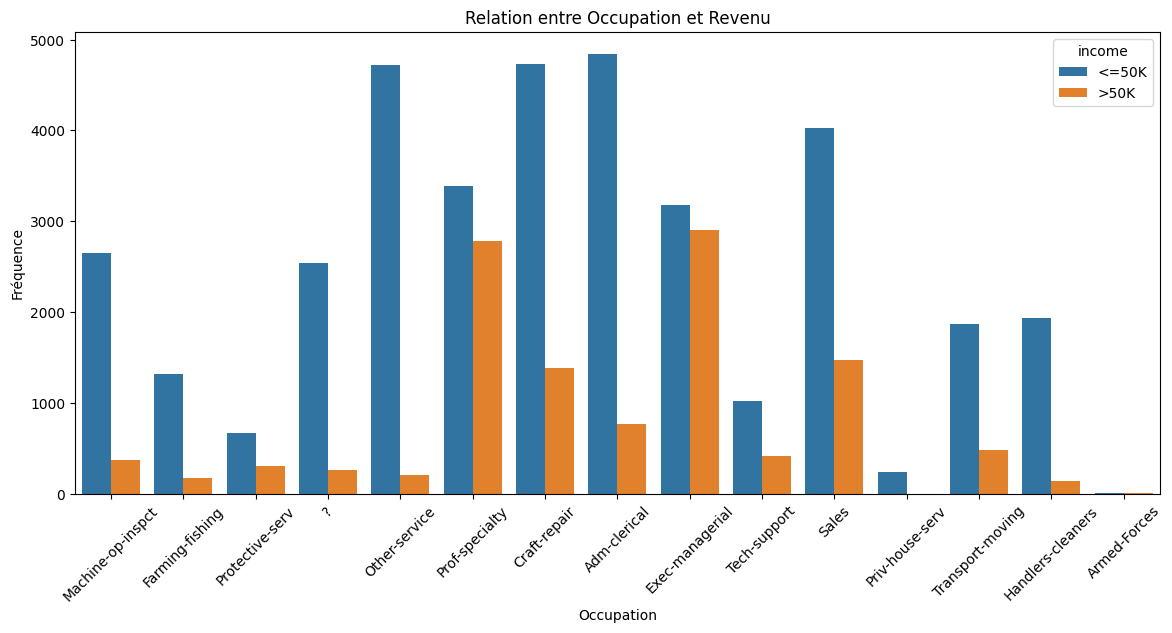

In [21]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Relation entre Occupation et Revenu')
plt.xlabel('Occupation')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

en fonction des metier cela varie beaucoup , mais par contre deux se distingue(prof-speciality&executive managerial) les deux on quasiment autant de +50k que de -50k et leur frequence et plutot eleve

Relation entre Race et Heures de travail par semaine

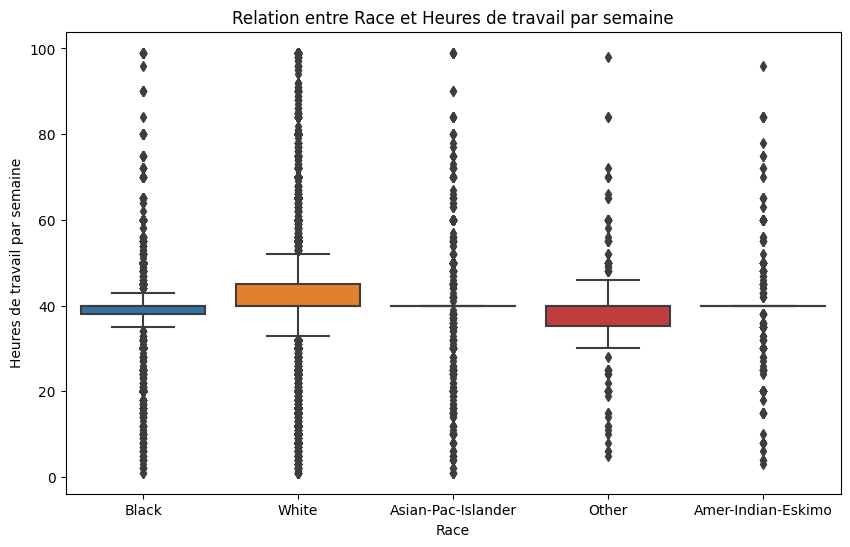

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='race', y='hours-per-week')
plt.title('Relation entre Race et Heures de travail par semaine')
plt.xlabel('Race')
plt.ylabel('Heures de travail par semaine')
plt.show()

il n y a pas une grande difference entre les race en terme d heure travailler

Relation entre Sexe et Revenu

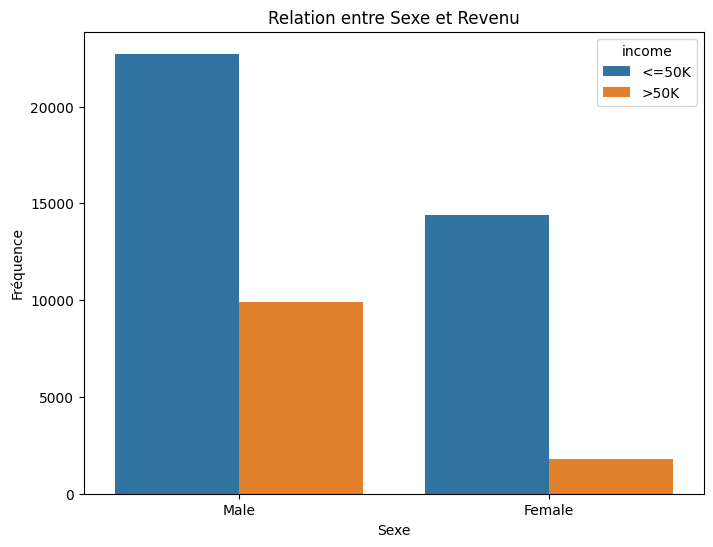

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='income')
plt.title('Relation entre Sexe et Revenu')
plt.xlabel('Sexe')
plt.ylabel('Fréquence')
plt.show()

clairement ici on voit qu il y a une inegalite entre les hommes et les femmes , au detriment des femme en plus de 50k par an , proportionnelement il y a 5 fois plus d homme que de femmmes.

#Futur Engineering:

je trouve interessant de faire une nouvelle colonne en age groupe qui sera divise en trois "Jeune", "Adulte" et "Senior".

In [29]:
# Création colonne "Age Group"
df['Age Group'] = pd.cut(df['age'], bins=[0, 29, 59, 100], labels=['Jeune', 'Adulte', 'Senior'])

# 5premières lignes pour vérifier la nouvelle colonne
df[['age', 'Age Group']].head()


,age,Age Group
0,25,Jeune
1,38,Adulte
2,28,Jeune
3,44,Adulte
4,18,Jeune


nous colone "hight income" elle sera binaire pour classifier directement les + ou - de 50k

In [30]:
# creation "High Income" avec lambda pour classifier les revenus
df['High Income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# verification
df[['income', 'High Income']].head()


,income,High Income
0,<=50K,0
1,<=50K,0
2,>50K,1
3,>50K,1
4,<=50K,0


creation colones categorisation des temps de travaille avec 'Part-Time', 'Full-Time', 'Over-Time'

In [31]:
#nouvelle colonne "Working Hours Category"
df['Working Hours Category'] = pd.cut(df['hours-per-week'], bins=[0, 29, 50, 100], labels=['Part-Time', 'Full-Time', 'Over-Time'])

# verification
df[['hours-per-week', 'Working Hours Category']].head()


,hours-per-week,Working Hours Category
0,40,Full-Time
1,50,Full-Time
2,40,Full-Time
3,40,Full-Time
4,30,Full-Time


Je pensse egalement qu avec la grande diversite d education il sera appreciable de divise cela en trois , bas/moyen/eleve

In [32]:
# Déf des catégories d'éducation
education_mapping = {
    'Preschool': 'Bas',
    '1st-4th': 'Bas',
    '5th-6th': 'Bas',
    '7th-8th': 'Bas',
    '9th': 'Bas',
    '10th': 'Bas',
    '11th': 'Bas',
    '12th': 'Bas',
    'HS-grad': 'Moyen',
    'Some-college': 'Moyen',
    'Assoc-acdm': 'Moyen',
    'Assoc-voc': 'Moyen',
    'Bachelors': 'Élevé',
    'Masters': 'Élevé',
    'Doctorate': 'Élevé',
    'Prof-school': 'Élevé'
}

# Création colonne "Educational Level"
df['Educational Level'] = df['education'].map(education_mapping)#ici la fonction map va aller chercher dans le dico qu on a creer la valeur associee a la 
                                                                #clef dans la colonne education

# verification
df[['education', 'Educational Level']].head()


,education,Educational Level
0,11th,Bas
1,HS-grad,Moyen
2,Assoc-acdm,Moyen
3,Some-college,Moyen
4,Some-college,Moyen


Le notebook commence a pese son poid et etre long , je pensse que pour faire une conclusion et resume d'EDA cela est satisfaisant, mais si l objectif aurai ete encore plus profond avec une mention "modelisation stat ou bien machine learning nous aurions normalise ,transforme les variable etc .
Nous allons donc passe a la conclusion.

#CONCLUSION!!! (je vous l ai mise en pdf mais au cas je la met en disponibilite ici egalement)


Conclusion de l'Analyse Exploratoire des Données (EDA)
Principales Découvertes:
Démographie: La majorité de la population représentée dans cet ensemble de données a entre 20 et 48 ans, ce qui pourrait être un indicateur du style de vie ou de la culture du travail aux États-Unis.

Valeurs Aberrantes: Les valeurs supérieures à 78 ans, ainsi que les variables de 'capital-gain' et 'capital-loss' très biaisées, sont considérées comme aberrantes. Leur présence pourrait biaiser tout modèle ultérieur, rendant leur exclusion envisageable.

Niveau d'Éducation: Les individus ayant des niveaux d'éducation tels que HS-grad, Some-college et Bachelors constituent environ les trois quarts de la population totale.

Heures de Travail: La majorité des individus travaillent entre 30 et 50 heures par semaine, ce qui correspond à la moyenne de travail aux États-Unis.

Genre: Les hommes sont nettement plus représentés que les femmes dans cet ensemble de données.

Race: Environ 90% des individus dans cet ensemble de données sont de race blanche.

Pays d'Origine: La grande majorité des individus sont originaires des États-Unis.

Capital Gain et Loss: La majorité des individus ont un capital-gain et un capital-loss de 0, indiquant peut-être que ces variables ne sont pas les meilleurs indicateurs de la situation financière dans cet ensemble de données.

Revenus: La plupart des individus ont des revenus inférieurs à 50k. Cependant, viser des individus hautement diplômés pourrait être une stratégie efficace pour cibler les personnes avec des revenus supérieurs à 50k.

Limitations et Biais:
L'échantillon est très déséquilibré en termes de genre et de race, ce qui pourrait introduire un biais dans toute analyse future. De plus, cet ensemble de données peut ne pas être représentatif de la population en général.

Relations et Corrélations:
Une corrélation positive a été observée entre le niveau d'éducation et les revenus, indiquant que plus le niveau d'éducation est élevé, plus la probabilité d'avoir des revenus supérieurs à 50k est grande.

Les métiers tels que "Prof-specialty" et "Executive-managerial" ont montré une répartition presque égale entre les revenus supérieurs et inférieurs à 50k.

Les tableaux de contingence ont révélé des relations intéressantes, comme le fait que les hommes sont nettement plus susceptibles de gagner plus de 50k par an que les femmes.

Conclusion:
Au terme de cette analyse exploratoire des données sur le revenu des adultes aux États-Unis, plusieurs observations clés se dégagent. La majorité de la population représentée est âgée de 20 à 48 ans, avec une surreprésentation notable des hommes et de la race blanche. Le niveau d'éducation semble également jouer un rôle significatif dans la détermination du revenu, avec une corrélation positive entre le niveau d'études et un revenu supérieur à 50 000 $ par an. Ce constat est particulièrement frappant dans des professions telles que les spécialités professionnelles et les postes de direction, où le nombre de personnes gagnant plus de 50 000 $ est presque équivalent à celui gagnant moins.

Cependant, il est important de noter que les variables 'capital-gain' et 'capital-loss' sont fortement biaisées, avec la majorité des valeurs étant à zéro. Cela suggère que ces variables pourraient ne pas être les meilleurs indicateurs de la situation financière et pourraient potentiellement biaiser un modèle prédictif. Pour minimiser ce biais, plusieurs approches pourraient être envisagées. L'une des méthodes serait de supprimer ces variables de l'ensemble de données si elles ne contribuent pas significativement à la prédiction du modèle. Une autre option serait de les normaliser pour atténuer leur impact. L'imputation de valeurs plus représentatives pourrait également être une stratégie, bien que cela puisse introduire d'autres formes de biais. Le choix de la méthode dépendra des objectifs spécifiques de l'analyse future.

En guise de prochaine étape, nous pourrions envisager de développer un modèle prédictif pour identifier les individus susceptibles de gagner plus de 50 000 $ par an. Un modèle de régression logistique pourrait être un bon point de départ pour cette tâche. Simple mais efficace, ce modèle permettrait non seulement de faire des prédictions précises, mais aussi de comprendre les variables qui ont le plus d'impact sur le revenu. Cette approche pourrait être particulièrement utile pour les entreprises ou les organisations cherchant à cibler une population spécifique dans le cadre de leurs initiatives marketing ou de recrutement.